In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### REading dataset

In [3]:
data=pd.read_csv('E:\End-2-end Projects\Password_Classifier/data.csv',error_bad_lines=False)
data.head()

b'Skipping line 2810: expected 2 fields, saw 5\nSkipping line 4641: expected 2 fields, saw 5\nSkipping line 7171: expected 2 fields, saw 5\nSkipping line 11220: expected 2 fields, saw 5\nSkipping line 13809: expected 2 fields, saw 5\nSkipping line 14132: expected 2 fields, saw 5\nSkipping line 14293: expected 2 fields, saw 5\nSkipping line 14865: expected 2 fields, saw 5\nSkipping line 17419: expected 2 fields, saw 5\nSkipping line 22801: expected 2 fields, saw 5\nSkipping line 25001: expected 2 fields, saw 5\nSkipping line 26603: expected 2 fields, saw 5\nSkipping line 26742: expected 2 fields, saw 5\nSkipping line 29702: expected 2 fields, saw 5\nSkipping line 32767: expected 2 fields, saw 5\nSkipping line 32878: expected 2 fields, saw 5\nSkipping line 35643: expected 2 fields, saw 5\nSkipping line 36550: expected 2 fields, saw 5\nSkipping line 38732: expected 2 fields, saw 5\nSkipping line 40567: expected 2 fields, saw 5\nSkipping line 40576: expected 2 fields, saw 5\nSkipping line 

b'Skipping line 525174: expected 2 fields, saw 5\nSkipping line 526251: expected 2 fields, saw 5\nSkipping line 529611: expected 2 fields, saw 5\nSkipping line 531398: expected 2 fields, saw 5\nSkipping line 534146: expected 2 fields, saw 5\nSkipping line 544954: expected 2 fields, saw 5\nSkipping line 553002: expected 2 fields, saw 5\nSkipping line 553883: expected 2 fields, saw 5\nSkipping line 553887: expected 2 fields, saw 5\nSkipping line 553915: expected 2 fields, saw 5\nSkipping line 554172: expected 2 fields, saw 5\nSkipping line 563534: expected 2 fields, saw 5\nSkipping line 565191: expected 2 fields, saw 5\nSkipping line 574108: expected 2 fields, saw 5\nSkipping line 574412: expected 2 fields, saw 5\nSkipping line 575985: expected 2 fields, saw 5\nSkipping line 580091: expected 2 fields, saw 5\nSkipping line 582682: expected 2 fields, saw 5\nSkipping line 585885: expected 2 fields, saw 5\nSkipping line 590171: expected 2 fields, saw 5\nSkipping line 591924: expected 2 field

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [4]:
data['strength'].unique()

array([1, 2, 0], dtype=int64)

#### code to check all the missing values in my dataset

In [5]:
data.isna().sum()

password    1
strength    0
dtype: int64

In [6]:
data[data['password'].isnull()]

,password,strength
367579,NaN,0


In [7]:
data.dropna(inplace=True)

In [8]:
data.isnull().sum()

password    0
strength    0
dtype: int64

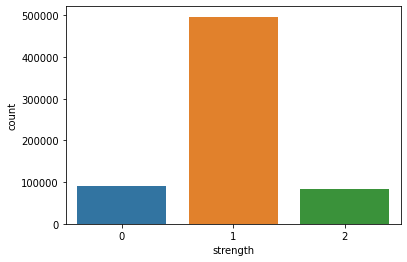

In [9]:
sns.countplot(data['strength'])

In [10]:
password_tuple=np.array(data)

In [11]:
password_tuple

array([['kzde5577', 1],
       ['kino3434', 1],
       ['visi7k1yr', 1],
       ...,
       ['184520socram', 1],
       ['marken22a', 1],
       ['fxx4pw4g', 1]], dtype=object)

#### shuffling randomly for robustness

In [12]:
import random
random.shuffle(password_tuple)

In [13]:
x=[labels[0] for labels in password_tuple]
y=[labels[1] for labels in password_tuple]


In [14]:
x

['kzde5577',
 'kzde5577',
 'kino3434',
 'kino3434',
 'megzy123',
 'AVYq1lDE4MgAZfNt',
 'lamborghin1',
 'kino3434',
 'v1118714',
 'lamborghin1',
 'v1118714',
 'v1118714',
 'u6c8vhow',
 'lamborghin1',
 'AVYq1lDE4MgAZfNt',
 'jytifok873',
 'asv5o9yu',
 'as326159',
 'asv5o9yu',
 'v1118714',
 'jytifok873',
 'elyass15@ajilent-ci',
 'visi7k1yr',
 'v1118714',
 'visi7k1yr',
 'sbl571017',
 'intel1',
 'universe2908',
 'visi7k1yr',
 'megzy123',
 'v1118714',
 'asgaliu11',
 'visi7k1yr',
 'megzy123',
 'universe2908',
 'faranumar91',
 'elyass15@ajilent-ci',
 'memjan123',
 'jytifok873',
 'jerusalem393',
 'trabajonet9',
 'asgaliu11',
 'lsdlsd1',
 'asv5o9yu',
 'kzde5577',
 'yitbos77',
 'idofo673',
 'g067057895',
 'yitbos77',
 '52558000aaa',
 'jytifok873',
 '0169395484a',
 'yqugu927',
 'ejeko677',
 'gaymaids1',
 'intel1',
 'asv5o9yu',
 'as326159',
 'bozoxik602',
 'juliel009',
 'lsdlsd1',
 'visi7k1yr',
 'calcifer32',
 'b4NbTxDEyNgG141J',
 'megzy123',
 'cigicigi123',
 'AVYq1lDE4MgAZfNt',
 'kswa2mrv',
 'cigic

#### create a custom function to split input into characters of list

In [15]:
def word_divide_char(inputs):
    character=[]
    for i in inputs:
        character.append(i)
    return character

In [16]:
word_divide_char('kzde5577')

['k', 'z', 'd', 'e', '5', '5', '7', '7']

#### import TF-IDF vectorizer to convert String data into numerical data

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
vectorizer=TfidfVectorizer(tokenizer=word_divide_char)

#### apply TF-IDF vectorizer on data

In [19]:
X=vectorizer.fit_transform(x)

In [20]:
X.shape

(669639, 128)

In [21]:
vectorizer.get_feature_names()

['\x04',
 '\x05',
 '\x06',
 '\x08',
 '\x0e',
 '\x10',
 '\x11',
 '\x12',
 '\x16',
 '\x17',
 '\x19',
 '\x1b',
 '\x1c',
 '\x1e',
 ' ',
 '!',
 '"',
 '#',
 '$',
 '%',
 '&',
 '(',
 ')',
 '*',
 '+',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '{',
 '|',
 '}',
 '~',
 '\x7f',
 '\x81',
 '\x8d',
 '\xa0',
 '¡',
 '¨',
 '«',
 '°',
 '±',
 '²',
 '³',
 '´',
 'µ',
 '¶',
 '·',
 '¹',
 'º',
 '¾',
 '¿',
 'ß',
 'à',
 'á',
 'â',
 'ä',
 'å',
 'æ',
 'ç',
 'è',
 'ê',
 'î',
 'ð',
 'ñ',
 'ò',
 'ó',
 'ô',
 'õ',
 'ö',
 '÷',
 'ú',
 'û',
 'ý',
 'þ',
 'ÿ',
 'œ',
 '—',
 '‚',
 '‹',
 '›']

In [22]:
first_document_vector=X[0]
first_document_vector

<1x128 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [23]:
first_document_vector.T.todense()

matrix([[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.56744396],
        [0.        ],
        [0.59121824],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0

In [26]:
df=pd.DataFrame(first_document_vector.T.todense(),index=vectorizer.get_feature_names(),columns=['TF-IDF'])
df.sort_values(by=['TF-IDF'],ascending=False)

,TF-IDF
7,0.591218
5,0.567444
z,0.335858
k,0.291619
d,0.285741
...,...
;,0.000000
9,0.000000
8,0.000000
6,0.000000


#### split data into train & test
    train---> To learn the relationship within data, 
    test-->  To do predictions, and this testing data will be unseen to my model

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)

In [29]:
X_train.shape

(535711, 128)

In [30]:
from sklearn.linear_model import LogisticRegression

#### Apply Logistic on data as use-cas is Classification

In [31]:
clf=LogisticRegression(random_state=0,multi_class='multinomial')

In [32]:
clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### doing prediction for specific custom data

In [33]:
dt=np.array(['%@123abcd'])
pred=vectorizer.transform(dt)
clf.predict(pred)

array([1])

#### doing prediction on X-Test data

In [34]:
y_pred=clf.predict(X_test)
y_pred

array([1, 2, 2, ..., 1, 1, 1])

#### check Accuracy of your model using confusion_matrix,accuracy_score

In [35]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [36]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))

[[ 5338 12530    18]
 [ 3811 92928  2629]
 [   50  4982 11642]]
0.8206499014395795


##### create report of your model

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.58      0.30      0.39     17886
           1       0.84      0.94      0.89     99368
           2       0.81      0.70      0.75     16674

    accuracy                           0.82    133928
   macro avg       0.75      0.64      0.68    133928
weighted avg       0.80      0.82      0.80    133928

